In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import itertools
import matplotlib.pyplot as plt

In [2]:
# Verzamel URL van elk artikel
pagelinks = []  # aanmaken leeg object om met links te vullen
url = "https://nos.nl/zoeken?q=GGD&date=2020-01-01&page=1"  # basis URL

while True:  # run loop terwijl IF statement TRUE is
    page = requests.get(url)  # benader URL
    soup = BeautifulSoup(page.content, 'html.parser')  # download HTML-code
    weblinks = soup.find_all("a", {"class": "search-results__link"})  # verzamel alle HTML-code van de artikelen
    pl =[]
    for i in range(len(weblinks)):   # voor elke HTML-code die een artikellink bevat: 
            pl.append('http://nos.nl'+ weblinks[i].get('href'))   # sla alle links uit de HTML-code op
    pagelinks.append(pl)  # voeg deze toe aan het object pagelinks
    if soup.find_all("span", {"class": "js-update link-hover"}):  # run loop terwijl dit TRUE is
        next_page = soup.find("span", {"class": "js-update link-hover"})  # verzamel de HTML-code van de volgende pagina
        url = "https://nos.nl" + next_page.get('data-url') + "&date=2020-01-01"  # haal de url eruit en voeg samen tot een link
    else:
        break

pagelinks_flat = list(itertools.chain(*pagelinks))  # flatten de list
pagelinks_flat[:5]

['http://nos.nl/nieuwsuur/artikel/2380218-niet-iedere-ggd-registreert-coronavaccinatie-in-het-gele-boekje',
 'http://nos.nl/nieuwsuur/video/2380778-welke-lessen-trekt-de-ggd-uit-de-vaccinatiecampagne',
 'http://nos.nl/nieuwsuur/artikel/2380772-ggd-wil-landelijke-crisisorganisatie-tussen-ministerie-en-regionale-ggd-s',
 'http://nos.nl/artikel/2379760-ggd-komt-nog-duizenden-werknemers-tekort-voor-massavaccinatie',
 'http://nos.nl/artikel/2379364-verdachten-datadiefstal-ggd-niet-van-bewust-dat-het-heel-ernstig-was']

In [3]:
# Verzamel titel van elk artikel
title = []
url = "https://nos.nl/zoeken?q=GGD&date=2020-01-01&page=1"

while True:
    page = requests.get(url) 
    soup = BeautifulSoup(page.content, 'html.parser')
    titles = soup.find_all("h3", {"class": "search-results__title"})  # aangepast naar titel node en class
    tt = []
    for i in range(len(titles)):    
          tt.append(titles[i].get_text())
    title.append(tt)
    if soup.find_all("span", {"class": "js-update link-hover"}):
        next_page = soup.find("span", {"class": "js-update link-hover"})
        url = "https://nos.nl" + next_page.get('data-url') + "&date=2020-01-01"
    else:
        break
        
title_flat = list(itertools.chain(*title))
title_flat[:5]

['Niet iedere GGD registreert coronavaccinatie in het gele boekje ',
 'Welke lessen trekt de GGD uit de vaccinatiecampagne?',
 "GGD wil landelijke crisisorganisatie tussen ministerie en regionale GGD's",
 'GGD komt nog duizenden werknemers tekort voor massavaccinatie',
 "Verdachten datadiefstal GGD: 'Niet van bewust dat het heel ernstig was'"]

In [4]:
# Verzamel datum van elk artikel
date = []
url = "https://nos.nl/zoeken?q=GGD&date=2020-01-01&page=1"

while True:
    page = requests.get(url) 
    soup = BeautifulSoup(page.content, 'html.parser')
    time = soup.find_all("time", {"class": "search-results__time"})  # aangepast naar datum node en class
    dt = []
    for i in range(len(time)):    
          dt.append(time[i].get('datetime'))
    date.append(dt)
    if soup.find_all("span", {"class": "js-update link-hover"}):
        next_page = soup.find("span", {"class": "js-update link-hover"})
        url = "https://nos.nl" + next_page.get('data-url') + "&date=2020-01-01"
    else:
        break
        
date_flat = list(itertools.chain(*date))
date_flat[:5]

['2021-05-10T21:15:30+0200',
 '2021-05-14T12:32:52+0200',
 '2021-05-14T22:33:46+0200',
 '2021-05-07T16:29:08+0200',
 '2021-05-04T12:58:40+0200']

In [5]:
# Verzamel de tekst van elk artikel
thearticle = []
for link in pagelinks_flat:    
    paragraphtext = []    
    url = link
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')    
    if "video" in link:
        articletext = soup.find_all('p', {"class": 'videoDescription_bAtNIfDM'})
    else:
        articletext = soup.find_all('p', {"class":'text_3v_J6Y0G'})
    for paragraph in articletext:
        text = paragraph.get_text()
        paragraphtext.append(text)        
    thearticle.append(paragraphtext)
    
thearticle[0]

["Niet alle GGD's werken mee aan het registreren van coronavaccinaties in het zogenoemde gele boekje. Het vaccinatieboekje is een officieel, meertalig vaccinatieregistratiesysteem van het ministerie van Volksgezondheid, Welzijn en Sport (VWS) en de Wereldgezondheidsorganisatie. Het wordt al jaren gebruikt voor het registreren van reisvaccinaties, zoals het hepatitisvaccin.",
 '"Mensen gaan ermee naar de GGD\'s als ze hun prik halen, maar sommige GGD\'s willen het niet invullen. Vervolgens bellen mensen ons voor hulp, maar wij kunnen niets doen", zegt Willeke de Groot, directeur overheid van de Staatsdrukkerij en -uitgeverij (SDU), die het boekje uitgeeft. Volgens SDU speelt dat met name in GGD-regio\'s Haaglanden, Drenthe en Noord- en Oost-Gelderland.',
 'De Groot begrijpt niet waarom sommige GGD\'s niet meewerken. "Je moet een plan B hebben, voor een situatie als nu, waarin een Europa-breed vaccinatiebewijs er nog niet is." Ze bracht het nut en de internationale status van het gele bo

In [6]:
# Lists samenvoegen in dataframe
df = pd.DataFrame(
    {'datetime': date_flat,
     'pagelink': pagelinks_flat,
     'title': title_flat,
     'text': thearticle
    })

df.head(2)

,datetime,pagelink,title,text
0,2021-05-10T21:15:30+0200,http://nos.nl/nieuwsuur/artikel/2380218-niet-i...,Niet iedere GGD registreert coronavaccinatie i...,[Niet alle GGD's werken mee aan het registrere...
1,2021-05-14T12:32:52+0200,http://nos.nl/nieuwsuur/video/2380778-welke-le...,Welke lessen trekt de GGD uit de vaccinatiecam...,[\n We spreken met Nicolette Rigter over ...


In [7]:
# Liveblogs eruit filteren
df = df[df["pagelink"].str.contains("liveblog")==False].reset_index(drop=True)

In [8]:
# Leestekens verwijderen, hoofdletters vervangen door kleine letters en titel en tekst samenvoegen
df['pure_title'] = df['title'].str.replace('[^A-Za-z0-9 ]+', ' ').str.lower()
df['pure_text'] = df['text'].astype(str).str.replace('[^A-Za-z0-9 ]+', ' ').str.lower()
df['title_text'] = df['pure_title'] + df['pure_text']
df.head()

,datetime,pagelink,title,text,pure_title,pure_text,title_text
0,2021-05-10T21:15:30+0200,http://nos.nl/nieuwsuur/artikel/2380218-niet-i...,Niet iedere GGD registreert coronavaccinatie i...,[Niet alle GGD's werken mee aan het registrere...,niet iedere ggd registreert coronavaccinatie i...,niet alle ggd s werken mee aan het registrere...,niet iedere ggd registreert coronavaccinatie i...
1,2021-05-14T12:32:52+0200,http://nos.nl/nieuwsuur/video/2380778-welke-le...,Welke lessen trekt de GGD uit de vaccinatiecam...,[\n We spreken met Nicolette Rigter over ...,welke lessen trekt de ggd uit de vaccinatiecam...,n we spreken met nicolette rigter over d...,welke lessen trekt de ggd uit de vaccinatiecam...
2,2021-05-14T22:33:46+0200,http://nos.nl/nieuwsuur/artikel/2380772-ggd-wi...,GGD wil landelijke crisisorganisatie tussen mi...,[Koepelorganisatie GGD GHOR Nederland wil dat ...,ggd wil landelijke crisisorganisatie tussen mi...,koepelorganisatie ggd ghor nederland wil dat ...,ggd wil landelijke crisisorganisatie tussen mi...
3,2021-05-07T16:29:08+0200,http://nos.nl/artikel/2379760-ggd-komt-nog-dui...,GGD komt nog duizenden werknemers tekort voor ...,[De GGD zoekt nog minstens 6000 en waarschijnl...,ggd komt nog duizenden werknemers tekort voor ...,de ggd zoekt nog minstens 6000 en waarschijnl...,ggd komt nog duizenden werknemers tekort voor ...
4,2021-05-04T12:58:40+0200,http://nos.nl/artikel/2379364-verdachten-datad...,Verdachten datadiefstal GGD: 'Niet van bewust ...,[Twee verdachten in de strafzaak rond het 'GGD...,verdachten datadiefstal ggd niet van bewust ...,twee verdachten in de strafzaak rond het ggd...,verdachten datadiefstal ggd niet van bewust ...


# Sentimentanalyse

In [10]:
# Inladen van dataset met positieve en negatieve woorden
# (Chen, Y., & Skiena, S., 2014. Building Sentiment Lexicons for All Major Languages. In ACL (2) (pp. 383-389))
negative = pd.read_csv('negative_words_nl.txt', header=None).rename(columns={0: 'word'})
negative['negative'] = 1
positive = pd.read_csv('positive_words_nl.txt', header=None).rename(columns={0: 'word'})
positive['positive'] = 1

In [11]:
# Woorden uit txt bestand samenvoegen in een dataframe 
words = positive.append(negative).fillna(0)
words

,word,positive,negative
0,eerste,1.0,0.0
1,naam,1.0,0.0
2,waar,1.0,0.0
3,wel,1.0,0.0
4,zoals,1.0,0.0
...,...,...,...
2465,stereotiep,0.0,1.0
2466,smeekbede,0.0,1.0
2467,irrationaal,0.0,1.0
2468,gallen,0.0,1.0


In [12]:
# Tekst opsplitsen in woorden
df_sentiment = df[['title_text']]
df_sent = df_sentiment['title_text'].str.split(' ', expand=True).stack().reset_index(level=0)
df_sent = df_sent.rename(columns={0: 'word'})
df_sent.head()

,level_0,word
0,0,ggd
1,0,komt
2,0,nog
3,0,duizenden
4,0,werknemers


In [13]:
# df_sent inner joinen met words en groeperen per artikel
join = df_sent.merge(words, how='inner', on='word')
join_sum = join.groupby('level_0')[["positive", "negative"]].sum()
join_sum.head()

,positive,negative
level_0,,
0,24.0,50.0
1,19.0,31.0
2,4.0,8.0
3,2.0,8.0
4,19.0,36.0


In [14]:
join_sum.describe()

,positive,negative
count,828.000000,828.000000
mean,19.282609,24.339372
std,13.397552,15.794541
min,0.000000,0.000000
25%,9.000000,13.000000
50%,17.000000,22.000000
75%,27.000000,35.000000
max,96.000000,84.000000


In [15]:
# Alles samenvoegen in data
data = df.merge(join_sum, left_index=True, right_index=True, how='left')
data = data.drop(columns=['title', 'text', 'pure_title', 'pure_text'])
data.head()

,datetime,pagelink,title_text,positive,negative
0,2021-05-07T16:29:08+0200,http://nos.nl/artikel/2379760-ggd-komt-nog-dui...,ggd komt nog duizenden werknemers tekort voor ...,24.0,50.0
1,2021-05-04T12:58:40+0200,http://nos.nl/artikel/2379364-verdachten-datad...,verdachten datadiefstal ggd niet van bewust ...,19.0,31.0
2,2021-05-01T12:33:03+0200,http://nos.nl/artikel/2378964-ggd-telefonisch-...,ggd telefonisch weer bereikbaar online nog ni...,4.0,8.0
3,2021-04-17T22:10:45+0200,http://nos.nl/nieuwsuur/video/2377144-het-rivm...,het rivm en ggd kunnen nu slecht inspelen op ...,2.0,8.0
4,2021-04-17T14:13:17+0200,http://nos.nl/artikel/2377083-topdrukte-bij-gg...,topdrukte bij ggd afsprakenlijn vaccinaties ...,19.0,36.0


In [16]:
# Verschil berekenen
data['verschil'] = data['positive'] - data['negative']

In [17]:
# Dataset opsplitsen in aritkelen die gaan over vaccineren en de rest
df['split'] = 0
df.loc[df['pure_title'].str.contains("vaccin"), 'split'] = 1  
df.loc[df['pure_title'].str.contains("prik"), 'split'] = 1  
df.head(3)

,datetime,pagelink,title,text,pure_title,pure_text,title_text,split
0,2021-05-07T16:29:08+0200,http://nos.nl/artikel/2379760-ggd-komt-nog-dui...,GGD komt nog duizenden werknemers tekort voor ...,['De GGD zoekt nog minstens 6000 en waarschijn...,ggd komt nog duizenden werknemers tekort voor ...,de ggd zoekt nog minstens 6000 en waarschijnl...,ggd komt nog duizenden werknemers tekort voor ...,1
1,2021-05-04T12:58:40+0200,http://nos.nl/artikel/2379364-verdachten-datad...,Verdachten datadiefstal GGD: 'Niet van bewust ...,"[""Twee verdachten in de strafzaak rond het 'GG...",verdachten datadiefstal ggd niet van bewust ...,twee verdachten in de strafzaak rond het ggd...,verdachten datadiefstal ggd niet van bewust ...,0
2,2021-05-01T12:33:03+0200,http://nos.nl/artikel/2378964-ggd-telefonisch-...,"GGD telefonisch weer bereikbaar, online nog ni...",['Mensen die zich willen laten testen of laten...,ggd telefonisch weer bereikbaar online nog ni...,mensen die zich willen laten testen of laten ...,ggd telefonisch weer bereikbaar online nog ni...,0


In [18]:
# Splitsing joinen met data
df3 = df[['datetime', 'split']]
data = data.merge(df3, on = 'datetime', how='left')
data.head(3)

,datetime,pagelink,title_text,positive,negative,verschil,split
0,2021-05-07T16:29:08+0200,http://nos.nl/artikel/2379760-ggd-komt-nog-dui...,ggd komt nog duizenden werknemers tekort voor ...,24.0,50.0,-26.0,1
1,2021-05-04T12:58:40+0200,http://nos.nl/artikel/2379364-verdachten-datad...,verdachten datadiefstal ggd niet van bewust ...,19.0,31.0,-12.0,0
2,2021-05-01T12:33:03+0200,http://nos.nl/artikel/2378964-ggd-telefonisch-...,ggd telefonisch weer bereikbaar online nog ni...,4.0,8.0,-4.0,0


In [19]:
# Datetime gebruiken zodat het als een datum wordt gezien
data['datetime'] = data['datetime'].str.slice(0, -14)
data['datetime'] = pd.to_datetime(data['datetime'])
data.head(3)

,datetime,pagelink,title_text,positive,negative,verschil,split
0,2021-05-07,http://nos.nl/artikel/2379760-ggd-komt-nog-dui...,ggd komt nog duizenden werknemers tekort voor ...,24.0,50.0,-26.0,1
1,2021-05-04,http://nos.nl/artikel/2379364-verdachten-datad...,verdachten datadiefstal ggd niet van bewust ...,19.0,31.0,-12.0,0
2,2021-05-01,http://nos.nl/artikel/2378964-ggd-telefonisch-...,ggd telefonisch weer bereikbaar online nog ni...,4.0,8.0,-4.0,0


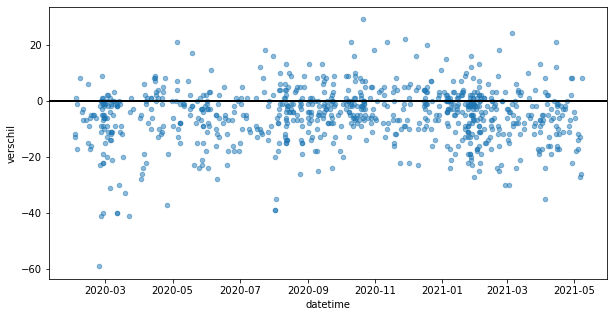

In [20]:
# Plot verschil positief negatief
plt.rcParams["figure.figsize"] = (10, 5)
data.plot.scatter(x="datetime", y="verschil", alpha=0.5)
plt.axhline(y=0, linewidth=2, color='black')

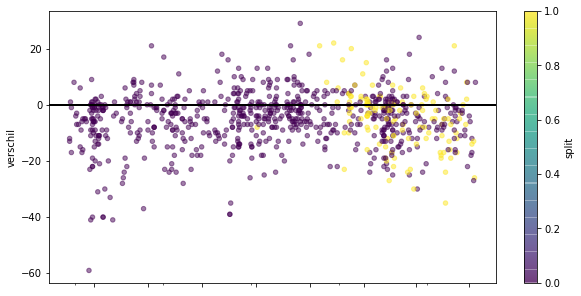

In [21]:
# Plot verschil positief negatief (geel: artikelen over vaccinatie, paars: artikelen niet over vaccinatie)
plt.rcParams["figure.figsize"] = (10, 5)
data.plot.scatter(x="datetime", y="verschil", c='split', colormap='viridis', alpha=0.5)
plt.axhline(y=0, linewidth=2, color='black')

In [22]:
# Gemiddelde per maand
data_mean = data.groupby(pd.Grouper(key='datetime',freq='M')).mean().reset_index()
# Aantal artikelen per maand
data_count = data.groupby(pd.Grouper(key='datetime',freq='M')).count().reset_index()
data_count = data_count[['datetime', 'pagelink']].rename(columns={'pagelink': 'number_of_articles'})
# Samenvoegen
data_mean_count = data_mean.merge(data_count, on = 'datetime', how='left')
data_mean_count.head(3)

,datetime,positive,negative,verschil,split,number_of_articles
0,2020-02-29,13.729167,22.687500,-8.958333,0.0,50
1,2020-03-31,15.755102,25.408163,-9.653061,0.0,49
2,2020-04-30,19.875000,24.875000,-5.000000,0.0,41


<AxesSubplot:xlabel='datetime', ylabel='number_of_articles'>

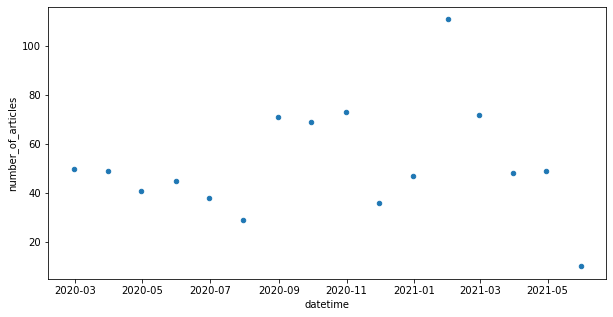

In [23]:
# Plot aantal artikelen per maand
plt.rcParams["figure.figsize"] = (10, 5)
data_mean_count.plot.scatter(x="datetime", y='number_of_articles')

<AxesSubplot:xlabel='datetime', ylabel='verschil'>

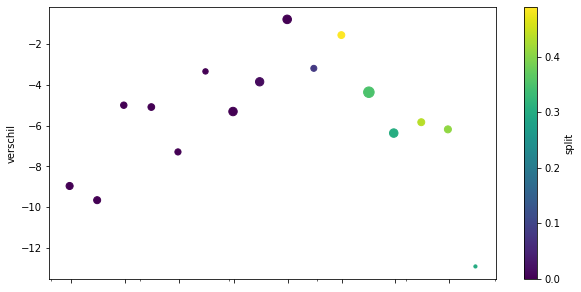

In [24]:
# Plot verschil positief negatief per maand + aantal artikelen + percentage artikelen over vaccinatie
plt.rcParams["figure.figsize"] = (10, 5)
data_mean_count.plot.scatter(x="datetime", y="verschil", s='number_of_articles', c='split', colormap='viridis')

In [25]:
# Twee dataframes: vaccinatie en niet-vaccinatie
grouped = data.groupby('split')
vaccinatie2 = grouped.get_group(1)
niet_vaccinatie2 = grouped.get_group(0)

In [26]:
# Vaccinatie groeperen per maand
vaccinatie = vaccinatie2.groupby(pd.Grouper(key='datetime',freq='M')).mean().reset_index()
vaccinatie.head(3)

,datetime,positive,negative,verschil,split
0,2020-09-30,11.000000,19.000000,-8.0,1.0
1,2020-10-31,NaN,NaN,NaN,NaN
2,2020-11-30,38.666667,21.666667,17.0,1.0


In [27]:
# Niet-vaccinatie groeperen per maand
niet_vaccinatie = niet_vaccinatie2.groupby(pd.Grouper(key='datetime',freq='M')).mean().reset_index()
niet_vaccinatie.head(3)

,datetime,positive,negative,verschil,split
0,2020-02-29,13.729167,22.687500,-8.958333,0
1,2020-03-31,15.755102,25.408163,-9.653061,0
2,2020-04-30,19.875000,24.875000,-5.000000,0


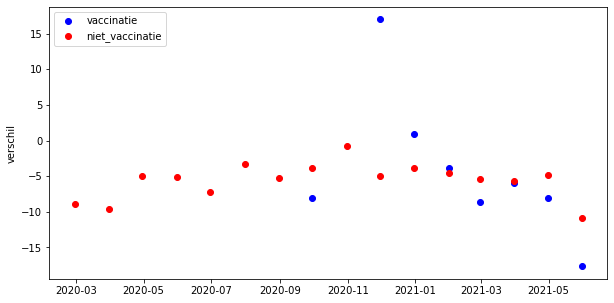

In [28]:
# Plot verschil positief negatief per maand + opgesplitst in vaccinatie/niet-vaccinatie
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(vaccinatie['datetime'], vaccinatie['verschil'], c='b', marker="o", label='vaccinatie')
ax1.scatter(niet_vaccinatie['datetime'], niet_vaccinatie['verschil'], c='r', marker="o", label='niet_vaccinatie')
plt.ylabel("verschil")
plt.legend(loc='upper left')
plt.show()

In [29]:
# Gemiddelde per 2 weken
data_mean_2week = data.groupby(pd.Grouper(key='datetime',freq='2W')).mean().reset_index()
# Aantal artikelen per 2 weken
data_count_2week = data.groupby(pd.Grouper(key='datetime',freq='2W')).count().reset_index()
data_count_2week = data_count_2week[['datetime', 'pagelink']].rename(columns={'pagelink': 'number_of_articles'})
# Samenvoegen
data_mean_count_2week = data_mean_2week.merge(data_count_2week, on = 'datetime', how='left')
data_mean_count_2week.head()

,datetime,positive,negative,verschil,split,number_of_articles
0,2020-02-02,10.000000,22.500000,-12.500000,0.0,2
1,2020-02-16,14.615385,20.076923,-5.461538,0.0,14
2,2020-03-01,13.297297,22.945946,-9.648649,0.0,38
3,2020-03-15,15.184211,24.078947,-8.894737,0.0,38
4,2020-03-29,21.714286,37.714286,-16.000000,0.0,7


<AxesSubplot:xlabel='datetime', ylabel='verschil'>

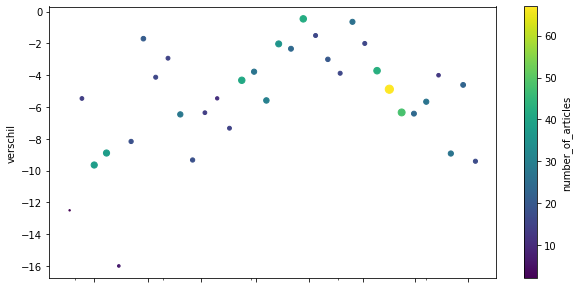

In [30]:
# Plot verschil positief negatief per 2 weken + aantal artikelen
plt.rcParams["figure.figsize"] = (10, 5)
data_mean_count_2week.plot.scatter(x="datetime", y="verschil", s='number_of_articles', c='number_of_articles', colormap='viridis')

In [31]:
# Artikelen over vaccinatie per 2 weken
vaccinatie_2week = vaccinatie2.groupby(pd.Grouper(key='datetime',freq='2W')).mean().reset_index()
# Aantal artikelen over vaccinatie per 2 weken
vaccinatie_count_2week = vaccinatie2.groupby(pd.Grouper(key='datetime',freq='2W')).count().reset_index()
vaccinatie_count_2week = vaccinatie_count_2week[['datetime', 'pagelink']].rename(columns={'pagelink': 'number_of_articles'})
# Artikelen niet over vaccinatie per 2 weken
niet_vaccinatie_2week = niet_vaccinatie2.groupby(pd.Grouper(key='datetime',freq='2W')).mean().reset_index()
# Aantal artikelen niet over vaccinatie per 2 weken
niet_vaccinatie_count_2week = niet_vaccinatie2.groupby(pd.Grouper(key='datetime',freq='2W')).count().reset_index()
niet_vaccinatie_count_2week = niet_vaccinatie_count_2week[['datetime', 'pagelink']].rename(columns={'pagelink': 'number_of_articles'})

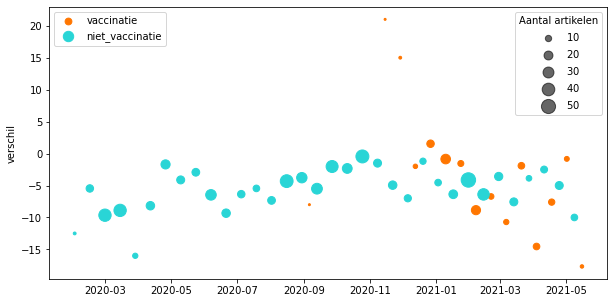

In [32]:
# Plot verschil positief negatief per 2 weken + opgesplitst in vaccinatie/niet-vaccinatie + aantal artikelen
fig = plt.figure()
ax1 = fig.add_subplot(111)

scatter = ax1.scatter(vaccinatie_2week['datetime'], vaccinatie_2week['verschil'], c='#ff7600', s=4*vaccinatie_count_2week['number_of_articles'], label='vaccinatie')
scatter = ax1.scatter(niet_vaccinatie_2week['datetime'], niet_vaccinatie_2week['verschil'], c='#29d5d6', s=4*niet_vaccinatie_count_2week['number_of_articles'], label='niet_vaccinatie')
ax1.set_ylabel('verschil')
legend1 = ax1.legend(loc="upper left")
ax1.add_artist(legend1)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, func = lambda x: x/4, num=5)
legend2 = ax1.legend(handles, labels, loc="upper right", title="Aantal artikelen")
plt.show()

In [33]:
# Inladen dataset gedrag en besmettingen (https://data.rivm.nl/covid-19/)
gedrag = pd.read_csv('COVID-19_gedrag.csv', sep=';')
besmettingen = pd.read_csv('COVID-19_casus_landelijk.csv', sep=';')

In [34]:
# Besmettingen groeperen
besmettingen['Date_statistics'] = pd.to_datetime(besmettingen['Date_statistics'], format='%d-%m-%Y')
besmettingen = besmettingen.groupby('Date_statistics').count().reset_index()
besmettingen = besmettingen[['Date_statistics', 'Date_file']].rename(columns={'Date_file': 'number_of_cases'})
besmettingen.head()

,Date_statistics,number_of_cases
0,2020-01-01,4
1,2020-01-04,1
2,2020-01-06,1
3,2020-01-16,1
4,2020-01-20,2


In [35]:
# Gedrag filteren op draagvlak
draagvlak = gedrag[(gedrag['Region_name'] == 'Nederland') & (gedrag['Subgroup_category'] == 'Alle') & (gedrag['Indicator_category'] == 'Draagvlak')]
draagvlak['Date_of_measurement'] = pd.to_datetime(draagvlak['Date_of_measurement'], format='%d-%m-%Y')
draagvlak.head()

<ipython-input-35-c0e9ac099f74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draagvlak['Date_of_measurement'] = pd.to_datetime(draagvlak['Date_of_measurement'], format='%d-%m-%Y')


,Date_of_report,Date_of_measurement,Wave,Region_code,Region_name,Subgroup_category,Subgroup,Indicator_category,Indicator,Sample_size,Figure_type,Value,Lower_limit,Upper_limit,Change_wrt_previous_measurement
0,4-5-2021 10:00,2020-09-29,1,NL00,Nederland,Alle,Totaal,Draagvlak,Avondklok,0,Percentage,NaN,NaN,NaN,NaN
36,4-5-2021 10:00,2020-09-29,1,NL00,Nederland,Alle,Totaal,Draagvlak,Bij_klachten_blijf_thuis,5002,Percentage,82.3,81.2,83.5,NaN
72,4-5-2021 10:00,2020-09-29,1,NL00,Nederland,Alle,Totaal,Draagvlak,Bij_klachten_laat_testen,4982,Percentage,64.3,62.8,65.8,NaN
108,4-5-2021 10:00,2020-09-29,1,NL00,Nederland,Alle,Totaal,Draagvlak,Draag_mondkapje_in_ov,0,Percentage,NaN,NaN,NaN,NaN
144,4-5-2021 10:00,2020-09-29,1,NL00,Nederland,Alle,Totaal,Draagvlak,Draag_mondkapje_in_publieke_binnenruimtes,0,Percentage,NaN,NaN,NaN,NaN


In [36]:
# Draagvlak groeperen per meetdatum en gemiddelde waarde nemen
draagvlak_mean = draagvlak.groupby('Date_of_measurement').mean().reset_index()
draagvlak_mean = draagvlak_mean[['Date_of_measurement', 'Value']]
draagvlak_mean

,Date_of_measurement,Value
0,2020-09-29,81.700000
1,2020-10-20,87.330000
2,2020-11-10,85.840000
3,2020-12-01,85.630000
4,2020-12-15,87.910000
5,2021-01-05,87.960000
6,2021-01-26,85.781818
7,2021-02-16,82.063636
8,2021-03-09,80.990909
9,2021-03-30,80.536364


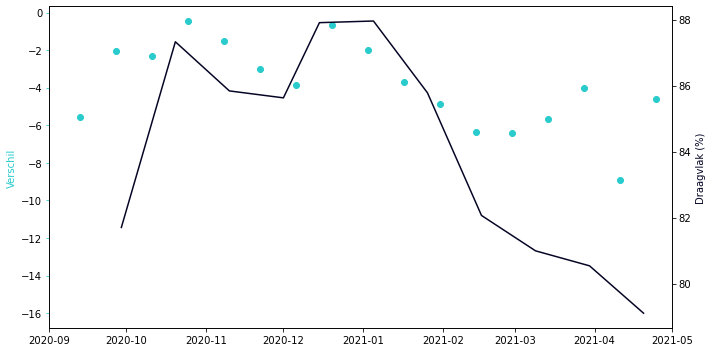

In [37]:
# Plot verschil positief negatief per 2 weken + draagvlak
fig, ax1 = plt.subplots()

color = '#29cbcd'
ax1.set_ylabel('Verschil', color=color)
ax1.scatter(data_mean_count_2week['datetime'], data_mean_count_2week['verschil'], color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()

color = '#040424'
ax2.set_ylabel('Draagvlak (%)', color=color)
ax2.plot(draagvlak_mean['Date_of_measurement'], draagvlak_mean['Value'], color=color)

fig.tight_layout()
plt.xlim('2020-09', '2021-05')
plt.show()

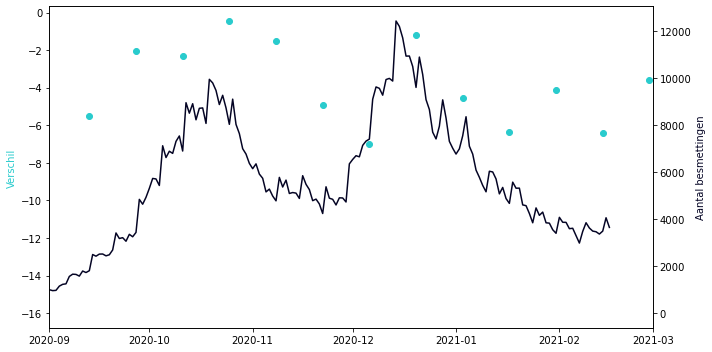

In [38]:
# Plot verschil positief negatief + aantal besmettingen
fig, ax1 = plt.subplots()

color = '#29cbcd'
ax1.set_ylabel('Verschil', color=color)
ax1.scatter(niet_vaccinatie_2week['datetime'], niet_vaccinatie_2week['verschil'], color=color)

ax2 = ax1.twinx()

color = '#040424'
ax2.set_ylabel('Aantal besmettingen', color=color) 
ax2.plot(besmettingen['Date_statistics'], besmettingen['number_of_cases'], color=color)

plt.xlim('2020-09', '2021-03')
fig.tight_layout()  
plt.show()